# Proyek Analisis Data : Bike Sharing Dataset

- Nama        : Muhammad Rahmat Dhany
- Email       : dhany.muhammad08@gmail.com
- ID Dicoding : dhanymuhammad

# Menentukan Pertanyaan Bisnis

1. Berapa Rata Rata jumlah Penyewaan di setiap musimnya?
2. Dimusim apa tingkat tertinggi penyewaan bike share ini berada? 

# Menyiapkan Semua Library yang Dibutuhkan

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st



# Data Wrangling

# Gathering Data

In [20]:
days = pd.read_csv('data\days.csv')
hour = pd.read_csv('data\hours.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\4181862783.py:1: SyntaxWarning: invalid escape sequence '\d'
  days = pd.read_csv('data\days.csv')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\4181862783.py:2: SyntaxWarning: invalid escape sequence '\h'
  hour = pd.read_csv('data\hours.csv')


In [21]:
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [35]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assesing Data

In [22]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [43]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [46]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [27]:
days.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [28]:
hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [36]:
days.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [37]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Setelah dicheck tidak ada missing value pada kedua dataframe tersebut

In [40]:
days.duplicated().sum()


np.int64(0)

In [42]:
hour.duplicated().sum()

np.int64(0)

terdeteksi juga tidak ada data yang terduplikat pada dataframe tersebut

# Cleaning Data

- saya akan menghilangkan kolom instant, karena tidak dibutuhkan
- saya juga akan menghilangkan kolom workingday dikarenakan adanya kolom weekday yang sudah mewakilinya
- saya akan mengganti nama kolom agar lebih mudah dibaca dan diingat
- saya juga akan konversi isi beberapa kolom agar lebih mudah untuk dibaca dan dipahami

#### Menghilangkan kolom

In [51]:
days.drop(['instant'], axis=1, inplace=True)

In [52]:
hour.drop(['instant'], axis=1, inplace=True)

In [64]:
days.drop(['workingday'], axis=1, inplace=True) 

#Maaf kak saya merunning commandnya 2x

KeyError: "['workingday'] not found in axis"

In [55]:
hour.drop(['workingday'], axis=1, inplace=True)

#ini juga saya merunningnya 2x kak

KeyError: "['workingday'] not found in axis"

In [58]:
days.describe()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Merubah Nama Kolom

In [63]:
days.rename(columns={
    'season' : 'musim',
    'yr':'Tahun',
    'mnth':'Bulan',
    'weekday':'hari_kerja',
    'weathersit':'kondisi_cuaca',
    'windspeed':'kecepatan_angin',
    'cnt':'count_cr',
    'hum':'kelembapan'},inplace=True)
print(days.columns)

Index(['dteday', 'musim', 'Tahun', 'Bulan', 'holiday', 'hari_kerja',
       'kondisi_cuaca', 'temp', 'atemp', 'kelembapan', 'kecepatan_angin',
       'casual', 'registered', 'count_cr'],
      dtype='object')


In [67]:
hour.rename(columns={
    'season' : 'musim',
    'yr':'Tahun',
    'mnth':'Bulan',
    'weekday':'hari_kerja',
    'weathersit':'kondisi_cuaca',
    'windspeed':'kecepatan_angin',
    'cnt':'count_cr',
    'hum':'kelembapan'},inplace=True)
print(hour.columns)

Index(['dteday', 'musim', 'Tahun', 'Bulan', 'hr', 'holiday', 'hari_kerja',
       'kondisi_cuaca', 'temp', 'atemp', 'kelembapan', 'kecepatan_angin',
       'casual', 'registered', 'count_cr'],
      dtype='object')


#### Mengkonversi isi beberapa kolom

In [65]:
days.musim.replace((1,2,3,4), ('Semi','Panas','Gugur','Dingin'), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\446131984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days.musim.replace((1,2,3,4), ('Semi','Panas','Gugur','Dingin'), inplace=True)


In [68]:
hour.musim.replace((1,2,3,4), ('Semi','Panas', 'Gugur','Dingin'), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\1745043003.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour.musim.replace((1,2,3,4), ('Semi','Panas', 'Gugur','Dingin'), inplace=True)


In [70]:
days.Tahun.replace((0,1), ('2011','2012'), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\580508692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days.Tahun.replace((0,1), ('2011','2012'), inplace=True)


In [71]:
hour.Tahun.replace((0,1), ('2011','2012'), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\3871848736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour.Tahun.replace((0,1), ('2011','2012'), inplace=True)


In [73]:
days.Bulan.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\1109807891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days.Bulan.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'), inplace=True)


In [74]:
hour.Bulan.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\3969593354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour.Bulan.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des'), inplace=True)


In [77]:
days.hari_kerja.replace((0,1,2,3,4,5,6), ('Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu'), inplace=True)

In [78]:
hour.hari_kerja.replace((0,1,2,3,4,5,6), ('Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu'), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\3543217915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour.hari_kerja.replace((0,1,2,3,4,5,6), ('Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu'), inplace=True)


In [79]:
days.kondisi_cuaca.replace((1,2,3,4), ('cerah','berkabut','hujan_salju_ringan','hujan_salju_lebat'), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\4010194605.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days.kondisi_cuaca.replace((1,2,3,4), ('cerah','berkabut','hujan_salju_ringan','hujan_salju_lebat'), inplace=True)


In [80]:
hour.kondisi_cuaca.replace((1,2,3,4), ('cerah','berkabut','hujan_salju_ringan','hujan_salju_lebat'), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14116\4064497887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour.kondisi_cuaca.replace((1,2,3,4), ('cerah','berkabut','hujan_salju_ringan','hujan_salju_lebat'), inplace=True)


# Exploratory Data Analysis

In [91]:
days.describe(include="all")

,dteday,musim,Tahun,Bulan,holiday,hari_kerja,kondisi_cuaca,temp,atemp,kelembapan,kecepatan_angin,casual,registered,count_cr
count,731,731,731,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,2,12,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,Gugur,2012,Jan,NaN,Sabtu,cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,366,62,NaN,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.028728,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,0.167155,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [92]:
hour.describe(include="all")

,dteday,musim,Tahun,Bulan,hr,holiday,hari_kerja,kondisi_cuaca,temp,atemp,kelembapan,kecepatan_angin,casual,registered,count_cr
count,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,2,12,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,Gugur,2012,Mei,NaN,NaN,Sabtu,cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,8734,1488,NaN,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,0.028770,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,6.914405,0.167165,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,0.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,NaN,NaN,NaN,18.000000,0.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [94]:
days.groupby(by="musim").count_cr.mean().sort_values(ascending=False).reset_index().head(10)

,musim,count_cr
0,Gugur,5644.303191
1,Panas,4992.331522
2,Dingin,4728.162921
3,Semi,2604.132597


In [95]:
hour.groupby(by="musim").count_cr.mean().sort_values(ascending=False).reset_index().head(10)

,musim,count_cr
0,Gugur,236.016237
1,Panas,208.344069
2,Dingin,198.868856
3,Semi,111.114569


Melihat dari tampilan kedua dataframe diatas, memiliki hasil yang berbeda pada rata rata yang dihasilkan sebagai berikut:
Musim Gugur: 5,644.30 (days), 236.02 (hour)
Musim Panas: 4,992.33 (days), 208.34 (hour)
Musim Dingin: 4,728.16 (days), 198.87 (hour)
Musim Semi: 2,604.13 (days), 111.11 (hour)
Musim gugur secara konsisten menunjukkan rata-rata penyewaan tertinggi di kedua dataset, baik berdasarkan data harian maupun per jam 

In [86]:
days.groupby(by="musim").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,musim,count_cr
0,Gugur,1061129
1,Panas,918589
2,Dingin,841613
3,Semi,471348


In [89]:
hour.groupby(by="musim").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,musim,count_cr
0,Gugur,1061129
1,Panas,918589
2,Dingin,841613
3,Semi,471348


Dari hasil diatas, dapat diketahui bahwa musim gugur menjadi yang tertinggi penyewaan dibanding musim lainnya.
Diikuti oleh musim panas di urutan kedua, lalu musim dingin dan terakhir musim semi.

# Data Visualization

1. Berapa Rata Rata jumlah Penyewaan di setiap musimnya?

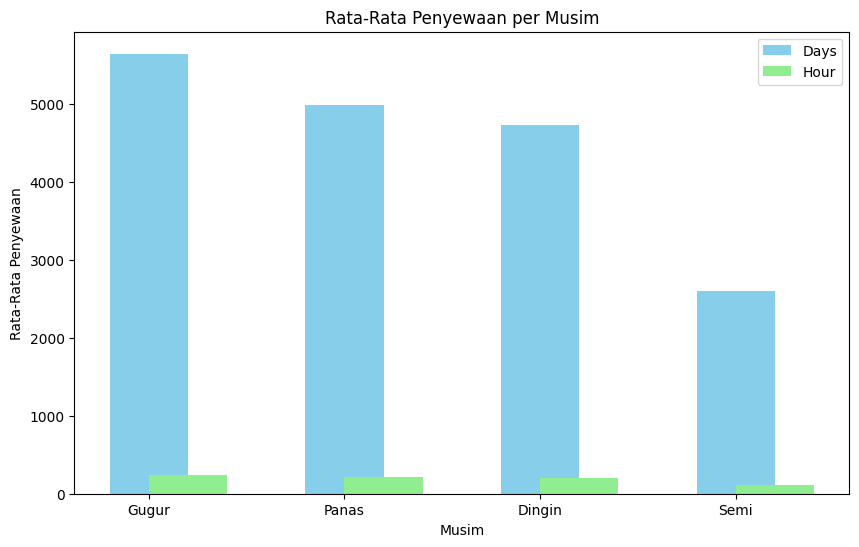

In [107]:
musim = ['Gugur', 'Panas', 'Dingin', 'Semi']
count_cr_days = [5644.30, 4992.33, 4728.16, 2604.13]  # Data dari DataFrame days
count_cr_hour = [236.02, 208.34, 198.87, 111.11]  # Data dari DataFrame hour

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(10, 6))

# Membuat bar chart untuk data days
ax.bar(musim, count_cr_days, width=0.4, label='Days', align='center', color='skyblue')

# Membuat bar chart untuk data hour
ax.bar(musim, count_cr_hour, width=0.4, label='Hour', align='edge', color='lightgreen')

# Menambahkan label, judul, dan legend
ax.set_xlabel('Musim')
ax.set_ylabel('Rata-Rata Penyewaan')
ax.set_title('Rata-Rata Penyewaan per Musim')
ax.legend()

# Menampilkan grafik
plt.show()

Dapat dilihat bahwa Musim gugur secara konsisten menunjukkan rata-rata penyewaan tertinggi di kedua data, baik berdasarkan data harian maupun per jam.
Musim Gugur: 5,644.30 (days), 236.02 (hour)
Musim Panas: 4,992.33 (days), 208.34 (hour)
Musim Dingin: 4,728.16 (days), 198.87 (hour)
Musim Semi: 2,604.13 (days), 111.11 (hour)


2. Dimusim apa tingkat tertinggi penyewaan bike share ini berada? 

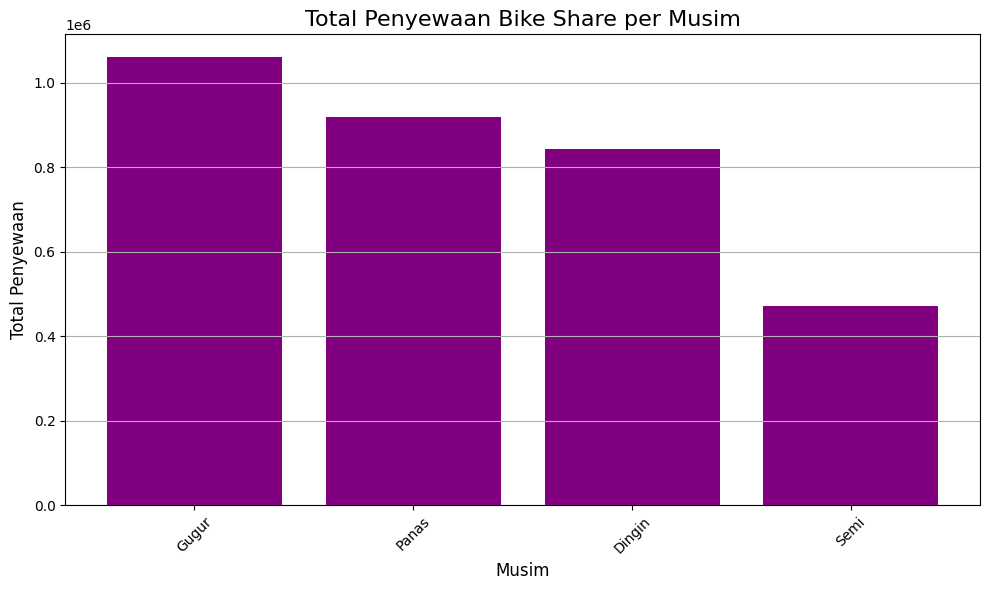

In [110]:
pb = {'musim': ['Gugur', 'Panas', 'Dingin', 'Semi'],
    'count_cr': [1061129, 918589, 841613, 471348]  # Data dari kedua DataFrame
}

# Membuat DataFrame
df = pd.DataFrame(pb)

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['musim'], df['count_cr'], color='purple')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.title('Total Penyewaan Bike Share per Musim', fontsize=16)
plt.xticks(rotation=45)  # Memutar label x-axis agar lebih mudah dibaca
plt.grid(axis='y')

# Menampilkan visualisasi
plt.tight_layout()  # Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.show()

Di sini terlihat dengan jelas bahwa tingkat tertinggi penyewaan bike share berada di musim gugur dengan total penyewaan mencapai 1.061.129 baik untuk data harian maupun per jam.

# Conclusion

1. Rata-rata penyewaan di setiap musim mencerminkan preferensi pengguna terhadap layanan bike share, yang mungkin dipengaruhi oleh faktor cuaca, aktivitas luar ruangan, dan acara khusus yang terjadi pada setiap musim. Dengan pemahaman ini, pihak penyedia layanan dapat merencanakan strategi yang lebih baik dalam meningkatkan penggunaan bike share di musim-musim yang memiliki tingkat penyewaan lebih rendah. Dengan melihat dari berbagai faktor hal ini bisa menjadi acuan untuk meningkatan penyewaan bike share ini di setiap musimnya

2. Musim gugur menunjukkan tingkat penyewaan tertinggi dengan total mencapai 1.061.129 unit, diikuti oleh musim panas dengan 918.589 unit, musim dingin dengan 841.613 unit, dan terakhir musim semi dengan 471.348 unit. Tentu hal ini bisa didukung oleh banyak faktor menarik yang membuat musim gugur menjadi yang tertinggi. Misalnya cuaca yang menyenangkan, Acara atau festival yang diadakan di musim gugur, Pemandangan yang menarik di musim gugur, dan lainnya yang membuat musim gugur menjadi tertinggi dalam penyewaan dibanding musim lainnya.